# 1. 파일 입출력 설명

## 1) csv, tsv, xlsx의 차이
### (1) csv
  CSV란 Comma-separated values의 약자 각 라인의 컬럼들이 콤마로 분리된 텍스트 파일 포맷이다. CSV 파일은 텍스트 파일일 뿐이며 데이터를 저장하지만 형식, 수식, 매크로 등은 포함하지 않는다. 각 레코드는 텍스트 파일의 한 줄로 저장되며 모든 줄바꿈은 새로운 데이터베이스 행을 나타낸다.
  이 파일형식은 다양한 프로그래밍 언어를 이용한 구문 분석이 쉬우며 숫자와 텍스트를 명확하게 구분할 수 있다는 장점이 있다. 또한  단순 텍스트파일이므로 프로그래밍 방식으로 조작하기 쉽다. 그러나 차트나 그래프를 저장할 수 없다.  

### (2) tsv
  CSV 파일과 비슷하지만, 콤마 대신 Tab으로 컬럼을 분리하는 파일포맷을 TSV 파일이라 한다.

### (3) xlsx
  엑셀파일은 통합 문서의 모든 워크시트에 대한 정보가 들어있는 이진파일이다. Excel은 데이터를 저장할 뿐만 아니라 데이터 작업도 수행할 수 있다. 외부 데이터 원본에 연결하여 데이터를 가져올 수 있으며, 자세한 추적 및 주석기능으로 데이터를 검토할 수 있다. 그러나 Microsoft Excel 문서에서만 열 수 있어 프로그래밍 방식으로 조작하기 어렵다.
  이 파일은 텍스트 편집기로 열거나 편집할 수 없으며, 자세한 표준화된 스키마 사양에 적합하다. 이 데이터를 분석하기 위한 프로그래밍 언어는 일반적으로 CSV에 비해 더 크고 속도가 빠르며 복잡하다. 데이터를 가져오는 동안 사용하는 메모리 양이 CSV에 비해 많다.




## 2) 파이썬으로 파일 읽고 쓰기

### (1) CSV
- 읽기:
가장 간단한 형태의 CSV 파일은 문자열을 콤마로 Split 하여 처리하면 되지만, 간혹 컬럼 데이타에 콤마가 있을 경우 이중인용부호로 감싸서 데이타 내의 콤마를 Escape하기 (예: "Lee, Alex") 때문에, 파이썬에 내장된 csv 모듈을 사용하여 .csv 파일을 처리하는 것이 좋다.

- 쓰기:
CSV 파일을 쓰기 위해서는 .csv 파일을 쓰기모드로 오픈하고 파일객체를 csv.writer(파일객체) 에 넣으면 된다. CSV writer는 writerow() 라는 메서드를 통해 list 데이타를 한 라인 추가하게 된다. 윈도우즈의 경우 csv 모듈에서 데이타를 쓸 때 각 라인 뒤에 빈 라인이 추가되는 문제가 있는데, 이를 없애기 위해 (파이썬 3 에서) 파일을 open 할 때 newline='' 와 같은 옵션을 지정한다 (주: 파이썬 2의 경우는 newline 옵션 없이 바이너리 모드로 오픈할 것)


#### 텍스트 파일 읽고 쓰기
https://wikidocs.net/26
https://wikidocs.net/81809
https://wikidocs.net/16077



In [ ]:
# CSV 파일 읽기 - 예시
import csv
 
f = open('data.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
for line in rdr:
    print(line)
f.close()    

# CSV 파일 쓰기
import csv    
f = open('output.csv', 'w', encoding='utf-8', newline='')
wr = csv.writer(f)
wr.writerow([1, "김정수", False])
wr.writerow([2, "박상미", True])
f.close()

### (2) TSV
- 읽기 및 쓰기
TSV 파일은 컬럼 delimiter만 차이가 나므로, csv 모듈의 reader() 혹은 writer() 함수에서 delimiter='\t' 옵션만 지정해 주면 나머지는 CSV와 동일하다. 특히, 위 예제에서 csv.reader()로부터 리턴된 객체를 list(reader객체)와 같이 리스트로 변환하였는데, 이는 데이터 양이 적을 때 데이타를 메모리로 한꺼번에 가져와 처리할 때 편리하다.

In [1]:
import csv

# TSV 파일 읽기 - 예시
f = open('test.tsv', 'r', encoding='utf-8')
rdr = csv.reader(f, delimiter='\t')
r = list(rdr)
print("Id=%s : Name=%s" % (r[0][0], r[0][1]))
 
f.close()

# TSV 파일 쓰기 - 예시
f = open('test.tsv', 'w', encoding='utf-8', newline='')
wr = csv.writer(f, delimiter='\t')
wr.writerow([1, "김정수", False])
wr.writerow([2, "박상미", True])
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

## 3) Json과 Jsonl의 차이

(1) Json
  JavaScript Object Notation(Json)은 Javascript 객체 문법으로 구조화된 데이터를 표현하기 위한 문자 기반의 표준 포맷이다. 웹 어플리케이션에서 데이터를 전송할 때 일반적으로 사용한다(서버에서 클라이언트로 데이터를 전송하여 표현하려거나 반대의 경우).
  Json은 문자열 형태로 존재하여 네트워크를 통해 전송할 때 아주 유용하다. 데이터에 액세스하기 위해서는 네이티브 Json 객체로 변환해야 한다. Javascript는 Json 전역 객체를 통해 문자열과 Json 객체의 상호변환을 지원한다.

(2) Jsonl
Json Line 형식이라는 뜻으로, 각 라인이 Json 객체로 이루어진 파일 형식이다. 쉽게 생각하면 한줄에 사전 하나씩 여러 개가 같이 있는 것이다. Jsonl은 다음과 같은 규칙이 있다.

i. UTF-8 인코딩일 것.
ii. 각 줄은 유효한 json형식이어야 한다.
iii. 줄 바꾸기 문자 "\n"으로 각 객체를 구분한다.


# 2. 코드

<파일명>
'실험'파일: experiment.csv
'일기'파일: diary-sample.json
코드에 주석을 달고, 처음 보는 사람이 보아도 이해할 수 있도록 과정을 상세히 서술하세요.

## 1. 실험 파일 (csv)
1.1. 실험 파일을 읽고 에러가 포함된 데이터는 삭제하세요.

1.2. 기초 통계치를 구하세요 (N, mean, SD, min, max)

1.3. 1.2에서 구한 값을 그래프로 시각화하세요 (시각화 방법은 자유)

1.4. 1.1에서 처리한 원본 데이터를 "processed_output.csv" 로 저장하세요.


In [1]:
#1.1 실험 파일을 읽고 에러가 포함된 데이터는 삭제하세요.
# CSV 파일 읽기
import pandas as pd
df=pd.read_csv('week3/experiment.csv', encoding = 'utf-8')

# 누락 데이터 확인
df.info()
df.head().isnull()
df.isnull().sum()

# 결측치 제거 - 결측치가 하나라도 존재하면 row 삭제
df_new = df.dropna()

# 결측치 500개 이상 존재하는 열 삭제
# df_thresh = df.dropna(axis = 1, thresh = 500)
# df_thresh.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   participant_id  107 non-null    int64  
 1   gender          107 non-null    object 
 2   age             107 non-null    int64  
 3   edu             106 non-null    float64
 4   fam_help        105 non-null    float64
 5   kakao           72 non-null     float64
 6   t_smart         106 non-null    float64
 7   t_intnet        106 non-null    float64
 8   tec_scop        106 non-null    float64
 9   it              106 non-null    float64
 10  it_i            106 non-null    float64
 11  it_c            106 non-null    float64
 12  it_s            106 non-null    float64
 13  ss              104 non-null    float64
 14  ss_setup        104 non-null    float64
 15  ss_app          104 non-null    float64
 16  wm              102 non-null    float64
 17  ss_spd          107 non-null    flo

In [2]:
#1.2. 기초 통계치를 구하세요 (N, mean, SD, min, max)
# 새로운 데이터 살펴보기
df_new
df_new.shape

# 필요한 열만 떼어내서 새로운 데이터프레임 변수에 넣기
#df1=df_new[["kakao"]]
#df2=df_new[["ts_ac", "ts_cost", "ts_comp"]
#df3=df_new[["bmi"]]

#기술 통계 구하기
print("전체:")
print(df_new.describe())


print("N:")
print(df_new.count())

print("MEAN:")
print(df_new.mean())

print("STD:")
print(df_new.std())

print("MIN:")
print(df_new.min())

print("MAX:")
print(df_new.max())



전체:
       participant_id        age        edu   fam_help        kakao  \
count       61.000000  61.000000  61.000000  61.000000    61.000000   
mean       309.918033  66.836066   3.016393   0.868852   153.565032   
std        142.178444   6.036501   0.991494   0.340363   204.707529   
min        102.000000  58.000000   1.000000   0.000000     0.000000   
25%        230.000000  61.000000   2.000000   1.000000    26.400000   
50%        361.000000  67.000000   3.000000   1.000000    81.937500   
75%        381.000000  71.000000   4.000000   1.000000   168.480000   
max        524.000000  81.000000   4.000000   1.000000  1092.285714   

         t_smart   t_intnet   tec_scop         it       it_i  ...       bmi  \
count  61.000000  61.000000  61.000000  61.000000  61.000000  ...  61.00000   
mean    4.098361   4.032787   4.377049  60.114754  20.229508  ...  24.14918   
std     1.135854   1.413827   1.781048  17.186330   5.478423  ...   2.66556   
min     1.000000   1.000000   1.000000  

<AxesSubplot:>

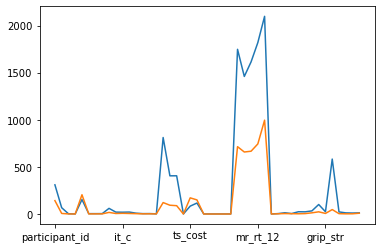

In [3]:
# 1.3 시각화
df_new.mean().plot()
df_new.std().plot()
#df_new.max().plot() -> 작동 x
#df_new.min().plot()
#df_new.mean().plot(kind='hist',figsize=(10,4),fontsize=10)


<AxesSubplot:ylabel='gender-None'>

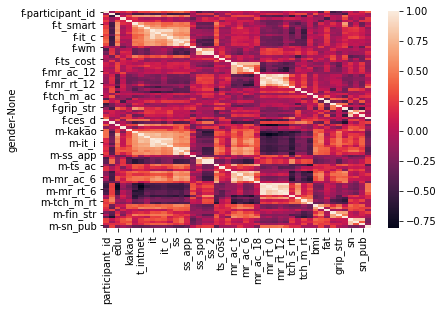

In [18]:
#성별 기준으로 데이터 그룹 나누어 1.2, 1.3 수행하기
import seaborn as sns
import numpy as np

df_gender=df_new.groupby('gender')
df_gender.corr()

# correlation matrix
sns.heatmap(df_gender.corr())

#df_new.groupby('gender')['height'].agg(**{'mean_height':'mean'}).reset_index()

In [20]:
# gender가 depression(ces-d) score를 예측하는지 알아보세요
# https://rfriend.tistory.com/383
#df_gender('ces_d').mean()

#df_gender.mean('ces_d')

df_new.groupby(['gender'])['ces_d'].mean()
#corr_d=df_gender.corr(method = 'pearson')
#print(corr_d)

#corr_with_d = lambda x: x.corrwith(x['ces-d'])
#df_gender.apply(corr_with_d)

gender
f    13.027027
m    11.541667
Name: ces_d, dtype: float64

In [5]:
#1.4 데이터 내보내기
df_new.to_csv('week3/processed_output.csv', index=False, encoding='utf-8' )


## 2. 일기 파일 (Json)
1.1. Json 파일 읽고 어떤 변수 및 값이 있는지 확인하기

1.2. Json 파일 내 다양한 정렬 방법이 무엇인지 검색해보고, 다른 정렬 방법 (3가지)으로 바꾼 후 다음 이름으로 저장하세요. (정렬 방법은 해당 방법 이름으로 대체하세요) (diary_sample_정렬방법1.json)

1.3. 변수 2개를 골라서 기초 통계를 구하고 해석하시오 (python의 dictionary 연습)

1.4. csv로 다시 저장하세요. 이 때, 이중 딕셔너리 및 리스트로 되어 있는 것들은 모두 풀어서 새 column으로 만들 것.

In [1]:
#1.1 데이터 읽기 및 확인 -> 작동 x
import json
#with open(r'week3/diary_sample.jsonl', 'r') as f:
#    json_data = json.load(f)


import pprint

with open(r'week3/diary_sample.jsonl', 'r') as f:
    json_data = f.read()
    json_data = json.loads(json_data)
    
pprint.pprint(json_data)


print(json.dumps(json_data, indent=2))

dict1 = {}
>>> dict2 = {}
>>> json.dumps([dict1, dict2])
'[{}, {}]'
>>> json.loads(json.dumps([dict1, dict2]))
[{}, {}]


#with open('week3/diary_sample.jsonl','r') as sample:
#    for line in sample:
#        line = json.loads(line.strip())
#with open('week3/diary_sample.jsonl') as f:
#    data = [json.loads(line) for line in f]
# data = [json.loads(line) for line in open('week3/diary_sample.jsonl', 'r')]
#data=[]
#for line in open('week3/diary_sample.jsonl', 'r'):
#        data.append(json.loads(line))
#with open(diary_sample, 'w') as f:
#    for d in diary_sample:
#        json.dump(d,f)
#        f.write('/n')
#    json_data = json.load(f, strict=False)


JSONDecodeError: Extra data: line 1 column 4 (char 3)

In [37]:
# pandas

import json
import pandas as pd

test='week3/diary_sample.jsonl'
#df=pd.read_json(test,orient='records') doesn't work, expects []

l=[ json.loads(l) for l in test.splitlines()]
df=pd.DataFrame(l)
pd.read_json(json_file, lines=True)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

## 참고문헌
### 1. 파일 입출력 설명

[csv, tsv, xlsx 의 차이](https://m.blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=nohsundong&logNo=221397615799&categoryNo=3&proxyReferer=)

[파이썬으로 파일 읽고 쓰기1](https://pb0364.tistory.com/30)
[파이썬으로 파일 읽고 쓰기2](http://pythonstudy.xyz/python/article/207-CSV-%ED%8C%8C%EC%9D%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0)

[json](https://developer.mozilla.org/ko/docs/Learn/JavaScript/Objects/JSON)
[jsonl](https://velog.io/@dmstj907/Python-Jsonlines)

### 2. 코드
1) 실험파일 csv

[csv 불러오기, 결측치 처리](https://yganalyst.github.io/data_handling/Pd_6/)
[csv 기술통계](https://appia.tistory.com/191)
[csv 기술통계2](https://yganalyst.github.io/data_handling/Pd_5/)
[시각화](https://lsh-story.tistory.com/)


[gender 그룹별 나누기](https://wikidocs.net/70485)
t 검정
https://mindscale.kr/course/basic-stat-python/16/
https://m.blog.naver.com/kunyoung90/222093343373
https://rfriend.tistory.com/tag/%EA%B7%B8%EB%A3%B9%EB%B3%84%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%AA%A8%ED%98%95%20%EC%A0%81%ED%95%A9%ED%95%98%EA%B8%B0


2) 실험파일 json
[json 파일 불러오기](https://devpouch.tistory.com/33)
https://stackoverflow.com/questions/21058935/python-json-loads-shows-valueerror-extra-data
